#  Dataset Loading 

In [2]:
!pip install -q datasets

In [3]:
from datasets import load_dataset
hugging_dataset = load_dataset("dair-ai/emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

# Explored Dataset 

In [4]:
hugging_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train = hugging_dataset["train"]
train

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [6]:
train[1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

In [7]:
train.column_names

['text', 'label']

In [8]:
train.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [9]:
train[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

# Coverting Dataset to Pandas 

In [10]:
import pandas as pd
hugging_dataset.set_format(type="pandas")
df=hugging_dataset["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
def label_name(row):
    return hugging_dataset["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_name)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


# Data Visualization

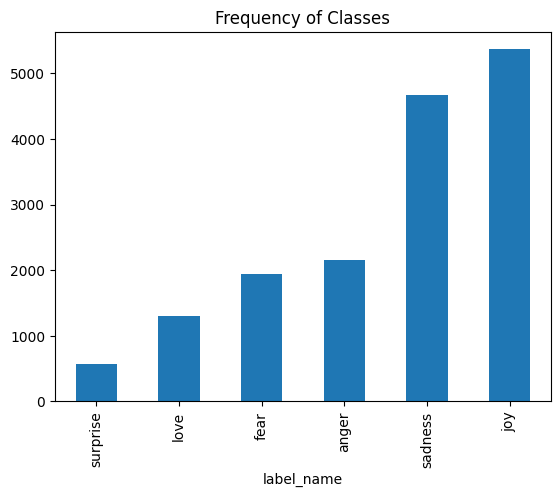

In [12]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.bar()
plt.title("Frequency of Classes")
plt.show()

In [13]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


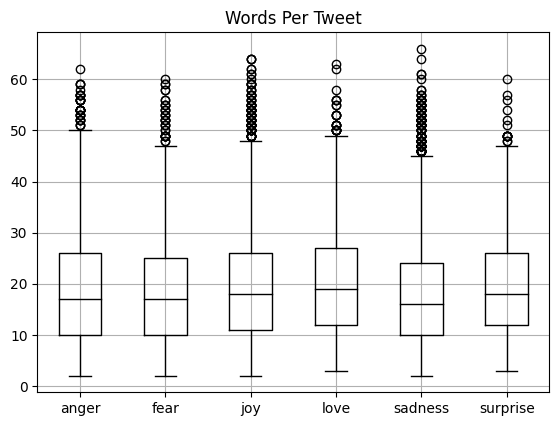

In [14]:
df.boxplot("Words Per Tweet", by="label_name", color = "black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [15]:
hugging_dataset.reset_format()

# Data Preprocessing 

## Word Tokenization 

In [16]:
text = "i didnt feel humiliated"
tokenized_text = text.split()
print(tokenized_text)

['i', 'didnt', 'feel', 'humiliated']


## Subword Tokenization

In [17]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

## Custom Tokenization

In [18]:
from transformers import DistilBertTokenizer

distbert_tokenize=DistilBertTokenizer.from_pretrained(model_ckpt)

## How to work with Tokenizer

In [19]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}


In [20]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'i', 'didn', '##t', 'feel', 'humiliated', '[SEP]']


In [21]:
tokenizer.convert_tokens_to_string(tokens)

'[CLS] i didnt feel humiliated [SEP]'

## Tokenizing the entire dataset & Preparing Dataset for Model Training

In [22]:
def tokenize(batch):
    return tokenizer(batch["text"], truncation=True)

In [23]:
# How to work tokenizer on our some data:
print(tokenize(hugging_dataset["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [24]:
emotions_encoded = hugging_dataset.map(tokenize, batched=True,
                               batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [25]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

## Padding

In [26]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer = tokenizer)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [27]:
# Let's take a look at the columns of the dataset
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']

# Model Training

In this section, we're going to load our BERT-based model, set metrics and training arguments and then train our model.

In [28]:
from transformers import AutoModelForSequenceClassification
import torch

num_labels = 6
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model=AutoModelForSequenceClassification.from_pretrained(model_ckpt,
         num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Evaluate

In [29]:
!pip install -q evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [30]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, 
                           references = labels)

## Setting Training Arguments

In [32]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="distilbert-emotion",
    num_train_epochs = 2, 
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy = "epoch",
    load_best_model_at_end = True,
    push_to_hub = False,
    report_to = "none"    
)

In [33]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = emotions_encoded["train"],
    eval_dataset = emotions_encoded["validation"],
    tokenizer = tokenizer,
)

In [34]:
trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.163702,0.934500
2,0.334600,0.138205,0.932000


TrainOutput(global_step=500, training_loss=0.3345681762695312, metrics={'train_runtime': 98.1766, 'train_samples_per_second': 325.943, 'train_steps_per_second': 5.093, 'total_flos': 468454694586624.0, 'train_loss': 0.3345681762695312, 'epoch': 2.0})

# Model Evaluation

## Predicting the validation dataset

In [35]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [36]:
preds_output.metrics

{'test_loss': 0.1382049322128296,
 'test_accuracy': 0.932,
 'test_runtime': 1.9602,
 'test_samples_per_second': 1020.291,
 'test_steps_per_second': 16.325}

# Confusion Matrix

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(preds_output.predictions, axis=1)

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize = "true")
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                 display_labels=labels)
    disp.plot(cmap="Blues", values_format = ".2f", ax = ax,
             colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [39]:
y_valid = np.array(emotions_encoded["validation"]["label"])
labels = hugging_dataset["train"].features["label"].names

In [45]:
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

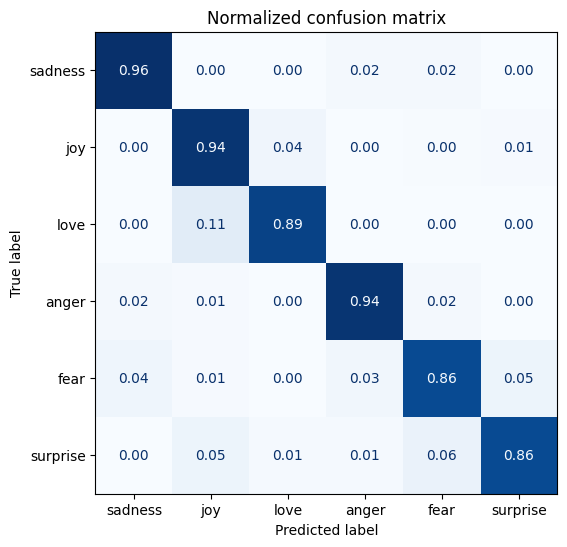

In [40]:
plot_confusion_matrix(y_preds, y_valid, labels)

# Model Prediction

In [47]:
from transformers import pipeline

model_id = "Tirendaz/distilbert-emotion"
classifier = pipeline("text-classification", model= model_id)

In [50]:
pred_text="Movie I watched yesterday made me upset"

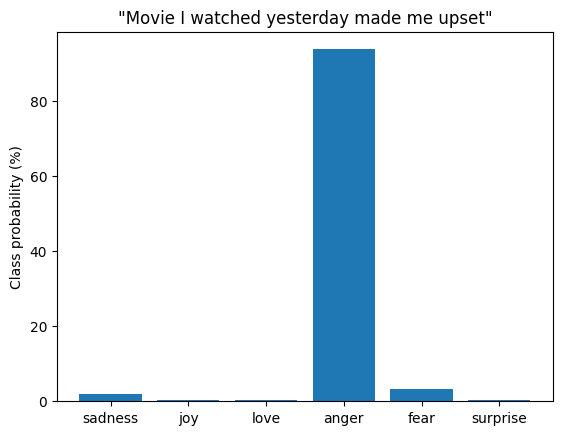

In [51]:
preds=classifier(pred_text, return_all_scores = True)
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100*preds_df["score"])
plt.title(f'"{pred_text}"')
plt.ylabel("Class probability (%)")
plt.show()